In [36]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pickle
import os
import cv2

In [37]:
data = pd.read_csv("./train.csv")
data = np.array(data)

rows, columns = data.shape
np.random.shuffle(data)

data_test = data[0:1000].T
X_test = data_test[1:columns]
Y_test = data_test[0]

data_train = data[1000:rows].T
y_train = data_train[0]
X_train = data_train[1:columns]
X_train = X_train / 255 # normalizing

In [38]:
def initParameters():
    # Each neuron in the hidden layer will need 784 weights for each input from the input layer and 1 bias.
    # This is thus provided in W1 and b1, as 10 rows with 784 columns each row refers to one neuron and the columns in that row refer to specific weights for that neuron
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5

    # Same is repeated for the output layer
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2

def ReLU(Z):
    # np.maximum() goes element-wise
    return np.maximum(0, Z)

def derivativeReLU(Z):
    return Z > 0

def Softmax(Z):
    exp = np.exp(Z)
    return exp / exp.sum(axis=0)

def forwardProp(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = Softmax(Z2)

    return Z1, A1, Z2, A2

def oneHot(Y):
    oneHotY = np.zeros((Y.size, Y.max() + 1))
    oneHotY[np.arange(Y.size), Y] = 1
    oneHotY = oneHotY.T
    return oneHotY

def backProp(Z1, A1, Z2, A2, W2, X, Y):
    # m is number of training examples
    m = Y.size
    oneHotY = oneHot(Y)

    dZ2 = 2*(A2 - oneHotY)
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, 1)

    dZ1 = (W2.T).dot(dZ2) * derivativeReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, 1)

    return dW1, db1, dW2, db2

def updateParameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * np.reshape(db1, (10, 1))
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * np.reshape(db2, (10, 1))

    return W1, b1, W2, b2

In [39]:
def getPredictions(A2):
    return np.argmax(A2, 0)

def getAccuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradientDescent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = initParameters()
    for i in range(iterations + 1):
        Z1, A1, Z2, A2 = forwardProp(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backProp(Z1, A2, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = updateParameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 10 == 0:
            print("Iteration :", i)
            print(f"Accuracy : {getAccuracy(getPredictions(A2), Y) * 100}%")
    
    return W1, b1, W2, b2

def makePrediction(X, W1, b1, W2, b2):
    _, _, _, A2 = forwardProp(W1, b1, W2, b2, X)
    predictions = getPredictions(A2)
    print(A2)
    return predictions

def testPrediction(index, W1, b1, W2, b2):
    currentImage = X_train[:, index, None]
    # print(currentImage.shape)
    # print(currentImage)
    prediction = makePrediction(currentImage, W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    currentImage = currentImage.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(currentImage, interpolation="nearest")
    plt.show()

[[3.16909806e-04]
 [4.19479772e-05]
 [5.11268570e-04]
 [1.07178029e-04]
 [1.15512152e-04]
 [3.87272338e-02]
 [9.53016379e-01]
 [1.03020834e-03]
 [1.26806675e-03]
 [4.86529567e-03]]
Predicted number : [6]


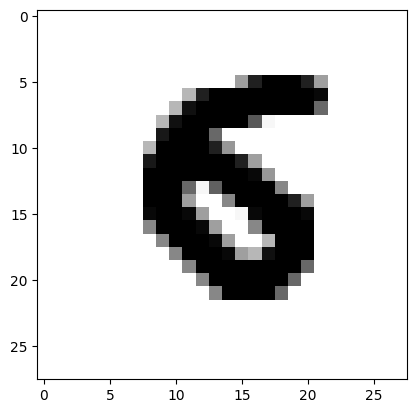

In [40]:
# W1, b1, W2, b2 = gradientDescent(X_train, y_train, 690, 0.1)

# with open("trainedParameters.pkl","wb") as dump_file:
#     pickle.dump((W1, b1, W2, b2),dump_file)

with open("trainedParameters.pkl","rb") as dump_file:
    W1, b1, W2, b2 = pickle.load(dump_file)

image = cv2.imread(f"testingImages\six.png")[:, :, 0]
image = np.array([image])
image = np.invert(image)
inputValues = np.reshape(image, (784, 1))
inputValues = inputValues / 255
# print(inputValues)
prediction = makePrediction(inputValues, W1, b1, W2, b2)
print(f"Predicted number : {prediction}")
plt.gray()
plt.imshow(image[0], cmap=plt.cm.binary)
plt.show()

# testPrediction(1, W1, b1, W2, b2)
# testPrediction(1, W1, b1, W2, b2)
# testPrediction(2, W1, b1, W2, b2)
# testPrediction(100, W1, b1, W2, b2)
# testPrediction(200, W1, b1, W2, b2)